In [41]:
!pip list
# check if packages are installed

Package                   Version
------------------------- -----------
appnope                   0.1.4
asttokens                 3.0.0
attrs                     25.3.0
beautifulsoup4            4.13.4
certifi                   2025.4.26
charset-normalizer        3.4.1
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.57.0
frozendict                2.4.6
idna                      3.10
ipykernel                 6.29.5
ipython                   9.2.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.3
jupyter_core              5.7.2
kiwisolver                1.4.8
lxml                      5.4.0
matplotlib                3.10.1
matplotlib-inline         0.1.7
multitasking    

In [42]:
# import packages
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# establish start times and end times
start = dt.datetime(2022, 11, 30)
end = dt.datetime(2025, 4, 25)
start, end

(datetime.datetime(2022, 11, 30, 0, 0), datetime.datetime(2025, 4, 25, 0, 0))

In [44]:
#etf's being downloaded
etf_list = ['QQQ', 'SMH']
etf_list

['QQQ', 'SMH']

In [45]:
#etf's being downloaded along with closing prices
df = yf.download(etf_list, start=start, end=end)
data = df.Close
data.head().dropna()

[*********************100%***********************]  2 of 2 completed


Ticker,QQQ,SMH
Date,,
2022-11-30,288.503876,111.416588
2022-12-01,288.857910,111.059433
2022-12-02,287.707336,109.532990
2022-12-05,282.878601,108.226692
2022-12-06,277.017273,105.853836


In [46]:
#calculate daily returns
returns = data.pct_change().dropna()
returns.count()

Ticker
QQQ    600
SMH    600
dtype: int64

In [ ]:
#calculate daily return differences
diff = returns['QQQ'] - returns['SMH']
diff.dropna().head()

Date
2022-12-01   -0.004433
2022-12-02   -0.009761
2022-12-05    0.004857
2022-12-06   -0.001205
2022-12-07    0.003852
dtype: float64

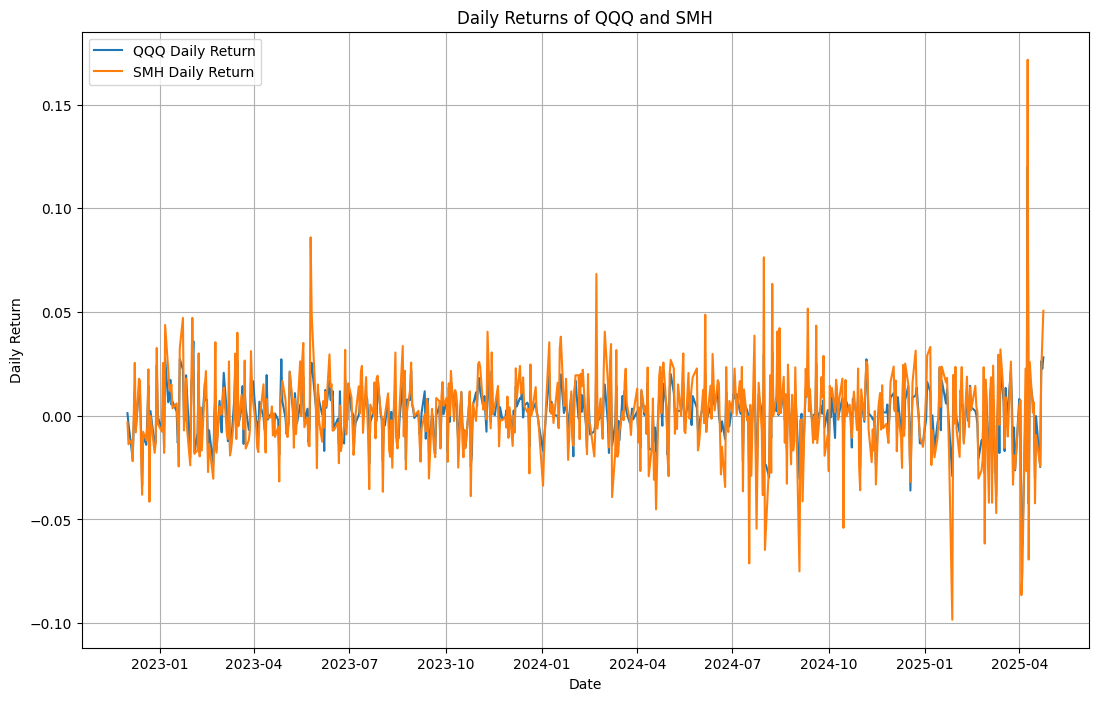

In [48]:
# plot daily returns of QQQ and SMH
plt.figure(figsize=(13,8))
plt.plot(returns.index, returns['QQQ'], label='QQQ Daily Return')
plt.plot(returns.index, returns['SMH'], label='SMH Daily Return')
plt.title('Daily Returns of QQQ and SMH')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

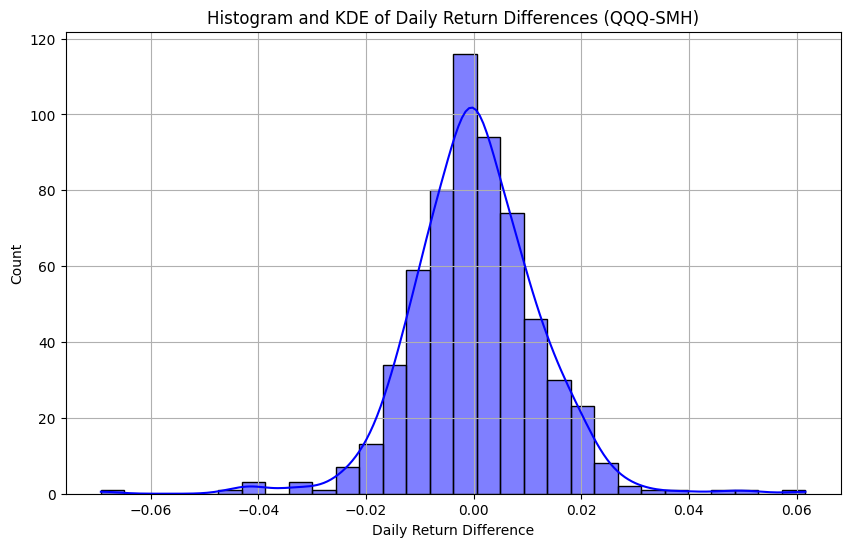

In [49]:
# graph daily return differences
plt.figure(figsize=(10, 6))
sns.histplot(diff, kde=True, bins=30, color='blue')
plt.title('Histogram and KDE of Daily Return Differences (QQQ-SMH)')
plt.xlabel('Daily Return Difference')
plt.grid(True)
plt.show()

In [50]:
# calculate lag-1 autocorrelations
lag1_qqq = returns['QQQ'].autocorr(lag=1)
lag1_smh = returns['SMH'].autocorr(lag=1)
print(f"{lag1_qqq:.4f}")
print(f"{lag1_smh:.4f}")

-0.0376
-0.0687


In [51]:
#calculate pearson correlation
correlation = returns['QQQ'].corr(returns['SMH'])
print(f"{correlation:.4f}")

0.8921


In [52]:
#perform paired t-test
t_statistic, p_value = stats.ttest_1samp(diff, popmean=0)
print(f"Paired t-test statistic: {t_statistic:.4f}")
print(f"Paired t-test p-value: {p_value:.4f}")

Paired t-test statistic: 0.8225
Paired t-test p-value: 0.4111
